In [ ]:
#connecting with Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the dataset
import pandas as pd
path = "/content/drive/MyDrive/spam.csv"
df = pd.read_csv(path, encoding='latin1')

In [ ]:
df = df.drop_duplicates()

In [ ]:
#viewing the dataset
print(df.sample(5))

        v1                                                 v2 Unnamed: 2  \
4426   ham          So what did the bank say about the money?        NaN   
4005   ham  IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...        NaN   
3528  spam  Xmas & New Years Eve tickets are now on sale f...        NaN   
3614   ham  I enjoy watching and playing football and bask...        NaN   
4165   ham  Well if I'm that desperate I'll just call arma...        NaN   

     Unnamed: 3 Unnamed: 4  
4426        NaN        NaN  
4005        NaN        NaN  
3528        NaN        NaN  
3614        NaN        NaN  
4165        NaN        NaN  


In [ ]:
df.shape

(5169, 5)

In [ ]:
#dropping useless columns
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
#renaming the columns
df = df.rename(columns={'v1': 'category', 'v2': 'message'})

In [ ]:
#encoding categorical data of target column
df['category'] = df['category'].str.strip().str.lower()
df['category'] = df['category'].map({'ham': 0, 'spam': 1})

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  # limit features to 3000 common words

X = vectorizer.fit_transform(df['message']).toarray()

y = df['category'].values

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5169, 3000)
y shape: (5169,)


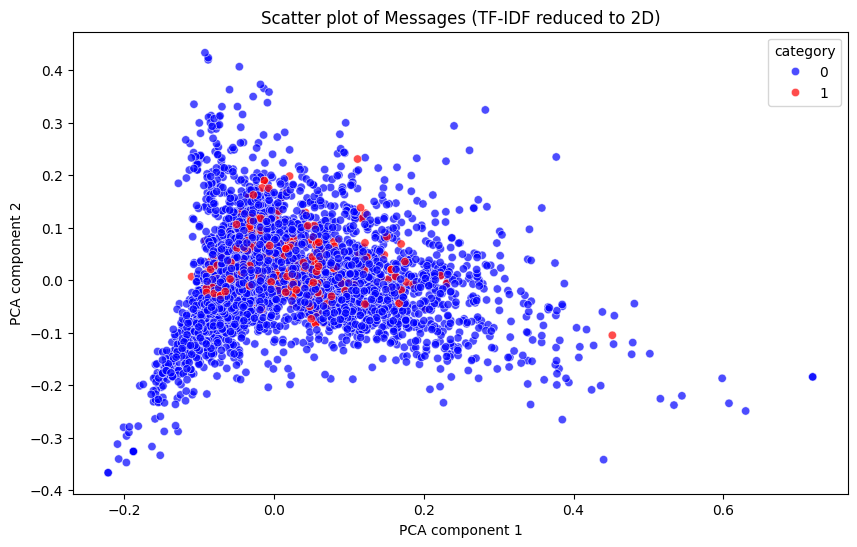

In [ ]:
# visualising the dataset

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
df['x'] = X_2d[:,0]
df['y'] = X_2d[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='x',
    y='y',
    hue='category',  # spam=1, ham=0
    palette={0:'blue', 1:'red'},
    data=df,
    alpha=0.7
)
plt.title("Scatter plot of Messages (TF-IDF reduced to 2D)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

In [ ]:
# import + setup
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# --- Logistic Regression GridSearchCV ---
lr_params = {
    'C': [0.01, 0.1, 1],
    'solver': ['lbfgs', 'liblinear']
}
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression params:", lr_grid.best_params_)

# --- Naive Bayes GridSearchCV ---
nb_params = {
    'alpha': [0.1, 0.5, 1.0]
}
nb = MultinomialNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_train, y_train)
best_nb = nb_grid.best_estimator_
print("Best Naive Bayes params:", nb_grid.best_params_)

Best Logistic Regression params: {'C': 1, 'solver': 'liblinear'}
Best Naive Bayes params: {'alpha': 0.1}


In [ ]:
# --- Random Forest GridSearchCV ---
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best Random Forest params:", rf_grid.best_params_)

Best Random Forest params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# --- Voting Classifier (Soft Voting) ---
voting = VotingClassifier(
    estimators=[('lr', best_lr), ('nb', best_nb), ('rf', best_rf)],
    voting='soft'
)

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

# --- Evaluation ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9845261121856866

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.89      0.94       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.97      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix:
 [[889   0]
 [ 16 129]]


In [ ]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "/content/vectorizer.pkl")

# Save the trained Voting Classifier
joblib.dump(voting, "/content/spam_model.pkl")

print("Model and vectorizer saved successfully in /content/")

Model and vectorizer saved successfully in /content/


In [ ]:
from google.colab import files

files.download("/content/vectorizer.pkl")
files.download("/content/spam_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>